In [6]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
from flying_discs.frispy.base import FrispyCalculator
from flying_discs.frispy.constants import FrispyUltrastarConstants
from flying_discs.frispy.coordinates import FrispyPosition
from frispy.disc import Disc

In [7]:
@dataclass
class Experiment:
    vx0: float = 0.0
    vy0: float = 0.0
    vz0: float = 0.0
    phi: float = 0.0
    theta: float = 0.0
    gamma: float = 0.0
    dphi: float = 0.0
    dtheta: float = 0.0
    dgamma: float = 0.0

In [8]:
experiments = [
    Experiment(vx0=40, vz0=10, phi=np.radians(2), dgamma=62),
    Experiment(vx0=40, vy0=10, phi=np.radians(4), dgamma=62),
    Experiment(vx0=45, vy0=2, phi=np.radians(2), dgamma=62),
]

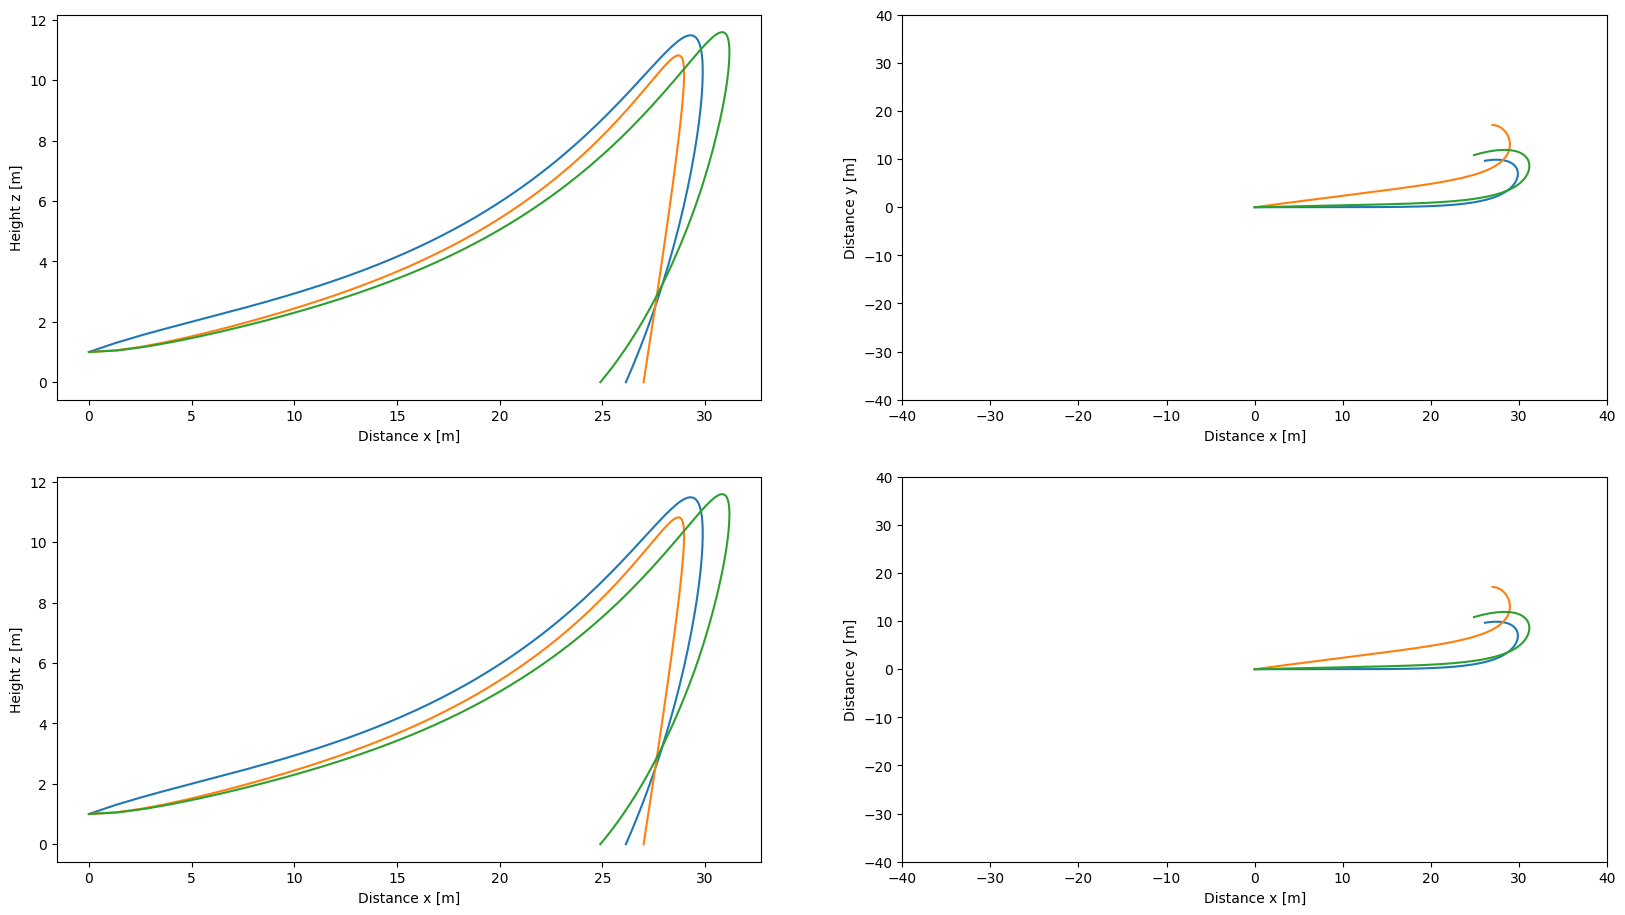

In [9]:
fig = plt.figure(figsize=(20, 11))
ax = fig.subplots(ncols=2, nrows=2)
for i, experiment in enumerate(experiments):
    initial_position = FrispyPosition(x=0, y=0, z=1)
    disc = FrispyCalculator(FrispyUltrastarConstants())
    trajectory = disc.calculate_trajectory(
        initial_position=initial_position,
        vx0=experiment.vx0,
        vy0=experiment.vy0,
        vz0=experiment.vz0,
        phi=experiment.phi,
        theta=experiment.theta,
        gamma=experiment.gamma,
        dphi=experiment.dphi,
        dtheta=experiment.dtheta,
        dgamma=experiment.dgamma,
        deltaT=0.033,
    )
    ax[0][0].plot(trajectory.X, trajectory.Z)
    ax[0][0].set_xlabel("Distance x [m]")
    ax[0][0].set_ylabel("Height z [m]")
    ax[0][1].plot(trajectory.X, trajectory.Y)
    ax[0][1].set_xlabel("Distance x [m]")
    ax[0][1].set_ylabel("Distance y [m]")
    ax[0][1].set_xlim([-40, 40])
    ax[0][1].set_ylim([-40, 40])

    disc = Disc(
        z=1,
        vx=experiment.vx0,
        vy=experiment.vy0,
        vz=experiment.vz0,
        phi=experiment.phi,
        dgamma=experiment.dgamma,
    )
    result, _ = disc.compute_trajectory(flight_time=20, n_times=int(1 / 0.033 * 20))
    ax[1][0].plot(result["x"], result["z"], label="Frispy")
    ax[1][0].set_xlabel("Distance x [m]")
    ax[1][0].set_ylabel("Height z [m]")
    ax[1][1].plot(result["x"], result["y"])
    ax[1][1].set_xlabel("Distance x [m]")
    ax[1][1].set_ylabel("Distance y [m]")
    ax[1][1].set_xlim([-40, 40])
    ax[1][1].set_ylim([-40, 40])
plt.show()